### I made this iPython notebook mainly to quickly generate figures that can be incorporated into our website and video.  

### This is a neat interactive visualization of simulated annealing that my Extreme Computing TF put together: http://richardkim.me/simulated_annealing/

In [1]:
# Import packages
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
import pandas as pd

# Import files
from annealing_helper_functions import distance, changepath, simulated_annealing, serial_parallel_tempering
from parallelism import parallel_parallel_tempering
from timer import Timer
from xml_parse import parse_xml_graph

# Parse graph
graph = parse_xml_graph('fri26.xml')
#Square matrix
assert graph.shape[0] == graph.shape[1]
size = graph.shape[0]

# Hardcoded best path to validate distance calculations, zero-indexed
bestpath = np.asarray([x-1 for x in [1, 25, 24, 23, 26, 22, 21, 17, 18, 20, 19, 16, 11, 12, 13, 15, 14, 10, 9, 8, 7, 5, 6, 4, 3, 2]])
print "Best path: " + str(bestpath)
print "Best path length: " + str(distance(graph, bestpath)) + "\n"

Best path: [ 0 24 23 22 25 21 20 16 17 19 18 15 10 11 12 14 13  9  8  7  6  4  5  3  2
  1]
Best path length: 937.0



In [2]:
# A random initial path, used as a starting point for the different optimizations to compare
initial_path = np.random.permutation(size)
print "Initial path: " + str(initial_path)
print "Initial path length: " + str(distance(graph, initial_path)) + "\n"

Initial path: [11 25 16 15  8  0 19 13 24 14  2 18 22  3 23  4 12 17  7  9  5  6 10 21 20
  1]
Initial path length: 2858.0



### I create a list of a million possible paths to get an idea about the distribution of all possible paths.

In [20]:
li = []
for i in range(1000000): li.append(distance(graph,np.random.permutation(size)))

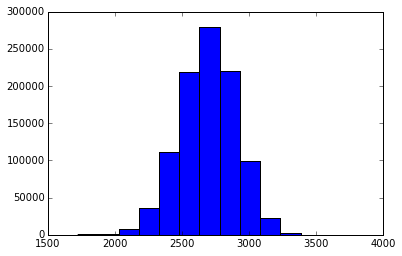

In [27]:
plt.hist(li, bins=12);

### In this sample of 1 million paths, the average path length was 2693 and the minimum path length was 1725, so the chances of randomly finding a path as short as the true minimum (937) are quite low.  When you think about it this way, it's kind of amazing that you can get within a couple hundred of the true minimum pretty easily by considering far less than 1% of all possible paths.  

In [33]:
pd.Series(li).describe()

count    1000000.000000
mean        2693.156735
std          208.645040
min         1725.000000
25%         2554.000000
50%         2699.000000
75%         2839.000000
max         3538.000000
dtype: float64

### Example of Simulated Annealing:

In [78]:
iterr = 10000
initial_temp = 70.
cool = 0.995
nbefore = 500
nswaps = 3
reheat = 0.001

In [79]:
%%time
# 10000 iteration runs of simulated annealing take about 1.2 seconds on my computer
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
print "Iterations: {:.2E}".format(iterr)
print "Calculated path: " + str(solution)
print "Calculated path length: " + str(distance(graph, solution))

Iterations: 1.00E+04
Calculated path: [15  8 11 20 10 12 21 25 22 23 24  0 14  9  7  6  5  4  3  1  2 13 16 17 19
 18]
Calculated path length: 1243.0
Wall time: 1.22 s


### Here is an example what the history of the energies and temperatures look like:

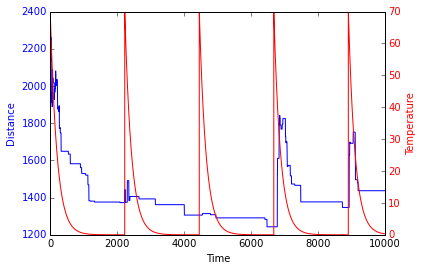

In [80]:
fig, ax1 = plt.subplots()

ax1.plot(range(iterr + 1), history, 'b-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(range(iterr + 1), history_temp, 'r')
ax2.set_ylabel('Temperature', color='r')
for t2 in ax2.get_yticklabels():
    t2.set_color('r')

### You can get a really good idea of how each parameter changes the behavior by examining the graph.  Ideally, the Distance will bounce around in the beginning, settle down at a low level, bounce around again once it heats back up, and then settle down again, ideally at a lower level than last time.  

Iterations: 1.00E+04
Calculated path: [15  9 13 14 12 11 20 25 17 16  8  4  5  3 10 21 22 23 24  0  1  2  6  7 19
 18]
Calculated path length: 1264.0


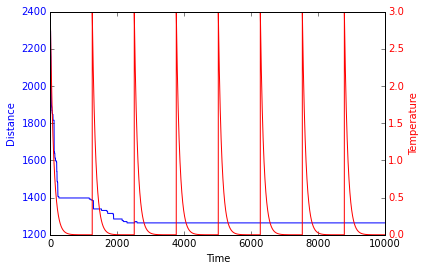

In [87]:
iterr = 10000
initial_temp = 3
cool = 0.99
nbefore = 100
nswaps = 1
reheat = 0.00001

# 10000 iteration runs of simulated annealing take about 1.2 seconds on my computer
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
print "Iterations: {:.2E}".format(iterr)
print "Calculated path: " + str(solution)
print "Calculated path length: " + str(distance(graph, solution))

fig, ax1 = plt.subplots()

ax1.plot(range(iterr + 1), history, 'b-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(range(iterr + 1), history_temp, 'r')
ax2.set_ylabel('Temperature', color='r')
for t2 in ax2.get_yticklabels():
    t2.set_color('r')

Iterations: 1.00E+04
Calculated path: [15  9 13 14  2  8  7  6  4  5  3  1  0 24 23 22 25 21 20 11 12 10 16 17 19
 18]
Calculated path length: 1039.0


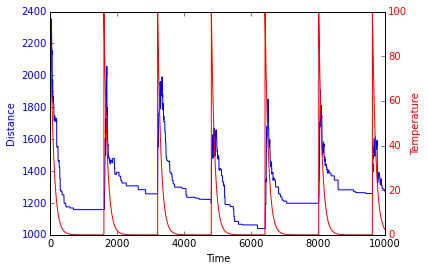

In [88]:
iterr = 10000
initial_temp = 100
cool = 0.99
nbefore = 100
nswaps = 1
reheat = 0.00001

# 10000 iteration runs of simulated annealing take about 1.2 seconds on my computer
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
print "Iterations: {:.2E}".format(iterr)
print "Calculated path: " + str(solution)
print "Calculated path length: " + str(distance(graph, solution))

fig, ax1 = plt.subplots()

ax1.plot(range(iterr + 1), history, 'b-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(range(iterr + 1), history_temp, 'r')
ax2.set_ylabel('Temperature', color='r')
for t2 in ax2.get_yticklabels():
    t2.set_color('r')

Iterations: 1.00E+04
Calculated path: [13 15 18 19 17 22 23 24 21 25 20 16 11 12 10  9  8  7  6  4  5  3  2  1  0
 14]
Calculated path length: 1046.0


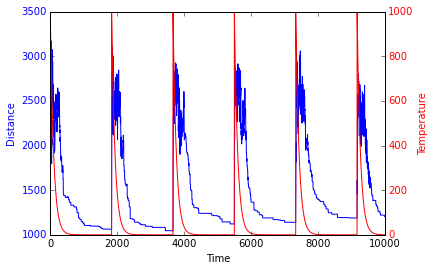

In [95]:
iterr = 10000
initial_temp = 1000
cool = 0.99
nbefore = 1
nswaps = 1
reheat = 0.00001

# 10000 iteration runs of simulated annealing take about 1.2 seconds on my computer
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
print "Iterations: {:.2E}".format(iterr)
print "Calculated path: " + str(solution)
print "Calculated path length: " + str(distance(graph, solution))

fig, ax1 = plt.subplots()

ax1.plot(range(iterr + 1), history, 'b-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(range(iterr + 1), history_temp, 'r')
ax2.set_ylabel('Temperature', color='r')
for t2 in ax2.get_yticklabels():
    t2.set_color('r')

### We need to optimize the parameters to be able to make a comparison between simulated annealing and parallel tempering.  There are five parameters that can be tuned, and the range of values for these is infinite.  This means that there are also infinite possibilities for the combinations of parameters.  Beyond this, we want to know how well each parameter combination performs on average, so we would want to run each parameter combination many times to examine its behavior.  
###This makes a rigorous exploration of the parameters very time-comsuming, so we do a very limited exploration of the parameters as a simplified example of how the parameters can first be optimized for each implementation to compare performance between simulated annealing and parallel tempering for parameters that have been optimized for both.  We perform a simple gradient descent of the parameter combinations by exploring a range of values for the first parameter while holding the other four constant, then use the best value from this comparision to explore a range of values for the second, and so on.  

### First I do a bit of a 'back of the envelope' calculation to do the parameter exploration in a limited amount of time.  A single 10,000 iteration run of simulated annealing takes about 1.2 seconds, so exploring a single parameter combination for 20 times to get an average should take less than 30 seconds.  Therefore, if I hold four of the parameters constant and explore a range of 10 values for the fifth parameter, each parameter exploration should take about five minutes.  Then, exploring all five should have a run time of roughly 25 minutes.  

### To isolate the variance that would be introduced by the variety of starting paths, we will use a single random starting paths for all 20 runs of each parameter combination.  

In [58]:
%%time
iterr = 10000

# These values are our starting points, and represent the initial value that will be considered while the earlier 
#    parameters are explored, and will then be updated after its best value is found.  At the end I will return the 
#   updated values of all five parameters, representing the best value for each that was found in its exploration.  
# These were selected based on a cursory, unscientific tinkering of parameter values.  
temp = 5
cool = 0.9
nbefore = 500
nswaps = 5
reheat = 0.0125

# These are the ranges of values to explore for each parameter.  
initial_temps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
initial_cools = [0.7, 0.8, 0.85, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999]
initial_nbefores = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
initial_nswaps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
initial_reheat = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]

# List of means for each temperature
mean_dists = []

# Run 20 simulations of each potential initial temperature
for initial_temp in initial_temps:
    # List of distances for each run of this temperature
    distances = []
    for i in range(20):
        solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
        distances.append(distance(graph,solution))
    mean_dists.append(np.mean(distances))

# Create a dictionary of the mean
temp_dist_dict = dict(zip(mean_dists,initial_temps))

# Find the minimum average distance that was found:
min_dist = np.min(temp_dist_dict.keys())

# Find the temperature corresponding to that distance
best_temp = temp_dist_dict[min_dist]

# The rest are repetitions of the above for each parameter:
mean_dists = []
for cool in initial_cools:
    distances = []
    for i in range(20):
        solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
        distances.append(distance(graph,solution))
    mean_dists.append(np.mean(distances))

cool_dist_dict = dict(zip(mean_dists,initial_cools))
min_dist = np.min(cool_dist_dict.keys())
cool = cool_dist_dict[min_dist]


mean_dists = []
for nbefore in initial_nbefores:
    distances = []
    for i in range(20):
        solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
        distances.append(distance(graph,solution))
    mean_dists.append(np.mean(distances))
nbefore_dist_dict = dict(zip(mean_dists,initial_nbefores))
min_dist = np.min(nbefore_dist_dict.keys())
nbefore = nbefore_dist_dict[min_dist]

mean_dists = []
for nswaps in initial_nswaps:
    distances = []
    for i in range(20):
        solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
        distances.append(distance(graph,solution))
    mean_dists.append(np.mean(distances))
nswaps_dist_dict = dict(zip(mean_dists,initial_nswaps))
min_dist = np.min(nswaps_dist_dict.keys())
nswaps = nswaps_dist_dict[min_dist]

mean_dists = []
for reheat in initial_reheat:
    distances = []
    for i in range(20):
        solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
        distances.append(distance(graph,solution))
    mean_dists.append(np.mean(distances))
reheat_dist_dict = dict(zip(mean_dists,initial_reheat))
min_dist = np.min(reheat_dist_dict.keys())
reheat = reheat_dist_dict[min_dist]

print "Best temperature found: ", temp
print "Best cool found: ", cool
print "Best nbefore found: ", nbefore
print "Best nswaps found:", nswaps
print "Best reheat: ", reheat

Best temperature found:  5
Best cool found:  0.9
Best nbefore found:  1000
Best nswaps found: 1
Best reheat:  0.4
Wall time: 24min 55s


In [90]:
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)

In [93]:
%%time
iterr = 4000000
solution, history, history_temp = simulated_annealing(graph, distance, 
                                    initial_path, initial_temp, nbefore,
                                    iterr, changepath, nswaps, reheat, cool)
print distance(graph,solution)

937.0
Wall time: 4min 17s


In [98]:
initial_temps = [1, np.sqrt(5), np.sqrt(5**2), np.sqrt(5**3)]
initial_path = [initial_path, initial_path, initial_path, initial_path]

nbefore = 100
nswaps = 3
